In [ ]:
%pip install -U scikit-fuzzy

In [ ]:
%pip install gymnasium

In [2]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

c:\Users\Sina Alinejad\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


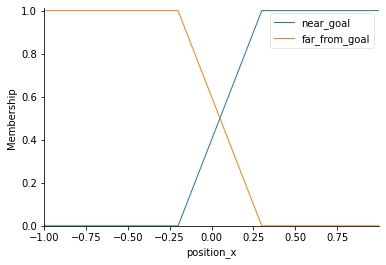

In [3]:
position_x = ctrl.Antecedent(np.arange(-1, 1, 0.001), 'position_x')

position_x['near_goal'] = fuzz.trapmf(position_x.universe, [-0.2, 0.3, 1, 1])
position_x['far_from_goal'] = fuzz.trapmf(position_x.universe, [-1, -1, -0.2, 0.3])

position_x.view()

c:\Users\Sina Alinejad\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


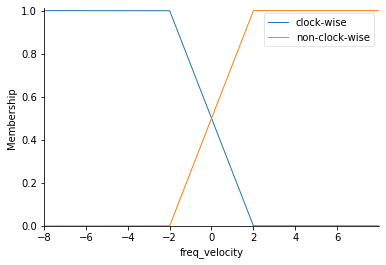

In [9]:
freq_velocity = ctrl.Antecedent(np.arange(-8, 8, 0.001), 'freq_velocity')

freq_velocity['clock-wise'] = fuzz.trapmf(freq_velocity.universe, [-8, -8, -2, 2])
freq_velocity['non-clock-wise'] = fuzz.trapmf(freq_velocity.universe, [-2, 2, 8, 8])

freq_velocity.view()

c:\Users\Sina Alinejad\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


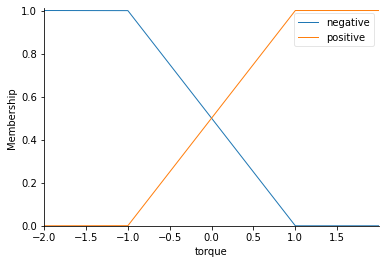

In [5]:
torque = ctrl.Consequent(np.arange(-2, 2, 0.001), 'torque')

torque['negative'] = fuzz.trapmf(torque.universe, [-2, -2, -1, 1])
torque['positive'] = fuzz.trapmf(torque.universe, [-1, 1, 2, 2])

torque.view()

In [10]:
rule1 = ctrl.Rule(position_x['near_goal'] & freq_velocity['non-clock-wise'], torque['negative'])
rule2 = ctrl.Rule(position_x['near_goal'] & freq_velocity['clock-wise'], torque['positive'])
rule3 = ctrl.Rule(position_x['far_from_goal'] & freq_velocity['clock-wise'], torque['negative'])
rule4 = ctrl.Rule(position_x['far_from_goal'] & freq_velocity['non-clock-wise'], torque['positive'])

In [11]:
controller = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simulator = ctrl.ControlSystemSimulation(controller)

In [19]:
env = gym.make("Pendulum-v1", render_mode="human")
rewards = []
observation, _ = env.reset()
for _ in range(500):
    simulator.input['position_x'] = observation[0]
    simulator.input['freq_velocity'] = observation[2]
    simulator.compute()
    decision = simulator.output['torque']

    observation, reward, terminated, truncated, info = env.step([decision])
    rewards.append(reward)
    # Make it easier
    if observation[0] >= 0.99 and abs(observation[2]) < 1.5:
        terminated=True
    
    env.render()
    
    if terminated:
        print(f'You Win in {_} iteration!')
        break

env.close()

You Win in 98 iteration!


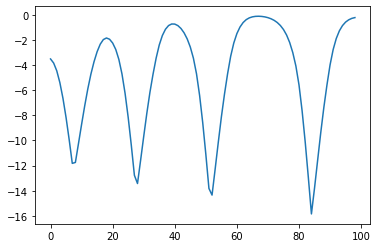

In [20]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
 
# define data values
x = np.arange(len(rewards))  # X-axis points
y = np.array(rewards)  # Y-axis points
 
plt.plot(x, y)  # Plot the chart
plt.show()  # display